In [2]:
accepts<- read.csv("data/accepts.csv",fileEncoding="GBK")

head(accepts)

application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,⋯,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
2314049,11613,1,1998,FORD,N,7,9,64,2,⋯,650,17200.00,17350,0.00,36,17200.00,99,6550.00,24000,1
63539,13449,0,2000,DAEWOO,N,0,21,240,11,⋯,649,19588.54,19788,683.54,60,19588.54,99,4666.67,22,0
7328510,14323,1,1998,PLYMOUTH,N,7,10,60,NA,⋯,613,13595.00,11450,0.00,60,10500.00,92,2000.00,19600,1
8725187,15359,1,1997,FORD,N,3,10,35,5,⋯,603,12999.00,12100,3099.00,60,10800.00,118,1500.00,10000,1
4275127,15812,0,2000,TOYOTA,N,0,10,104,2,⋯,764,26328.04,22024,0.00,60,26328.04,122,4144.00,14,0
8712513,16979,0,2000,DODGE,Y,2,15,136,4,⋯,680,26272.72,26375,0.00,36,26272.72,100,5400.00,1,0


In [3]:
accepts$bad_ind<-as.factor(accepts$bad_ind)

accepts<- accepts[,c(3,7:24)]

head(accepts)

bad_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
1,7,9,64,2,1,506,500,101,650,17200.00,17350,0.00,36,17200.00,99,6550.00,24000,1
0,0,21,240,11,7,34605,57241,60,649,19588.54,19788,683.54,60,19588.54,99,4666.67,22,0
1,7,10,60,NA,NA,NA,NA,0,613,13595.00,11450,0.00,60,10500.00,92,2000.00,19600,1
1,3,10,35,5,4,4019,5946,68,603,12999.00,12100,3099.00,60,10800.00,118,1500.00,10000,1
0,0,10,104,2,0,0,1800,0,764,26328.04,22024,0.00,60,26328.04,122,4144.00,14,0
0,2,15,136,4,3,3651,5747,64,680,26272.72,26375,0.00,36,26272.72,100,5400.00,1,0


In [5]:
set.seed(10)

select<-sample(1:nrow(accepts),length(accepts$bad_ind)*0.7)
train<-accepts[select,]
test<-accepts[-select,]

summary(train$bad_ind)

0    1 
3233  858

##   Section 1: C50算法

In [8]:
#请注意，R中的C50包比较新，存在一些问题，比如遇到缺失值、字符类型变量会报错“c50 code called exit with value 1”
train<-na.omit(train)
library(C50)

In [9]:
tc <- C5.0Control(subset=F,CF=0.25,winnow=F,noGlobalPruning = F,minCases = 20)

model<- C5.0(bad_ind~.,data=train,rules = F,control = tc)

summary(model)


Call:
C5.0.formula(formula = bad_ind ~ ., data = train, rules = F, control = tc)


C5.0 [Release 2.07 GPL Edition]  	Thu Nov 10 16:48:03 2016
-------------------------------

Class specified by attribute `outcome'

Read 3001 cases (19 attributes) from undefined.data

Decision tree:

fico_score > 661: 0 (2161/262)
fico_score <= 661:
:...tot_tr > 13:
    :...ltv <= 83: 0 (49/4)
    :   ltv > 83:
    :   :...fico_score <= 588: 1 (52/20)
    :       fico_score > 588: 0 (411/125)
    tot_tr <= 13:
    :...rev_util > 116: 1 (26/5)
        rev_util <= 116:
        :...used_ind > 0: 0 (181/78)
            used_ind <= 0:
            :...purch_price <= 25000: 1 (92/40)
                purch_price > 25000: 0 (29/5)


Evaluation on training data (3001 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     8  539(18.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	  2357    65    (a): class 0
	   474   105    (b): class 1


	Attribute usage:

	100.00%	fico_scor

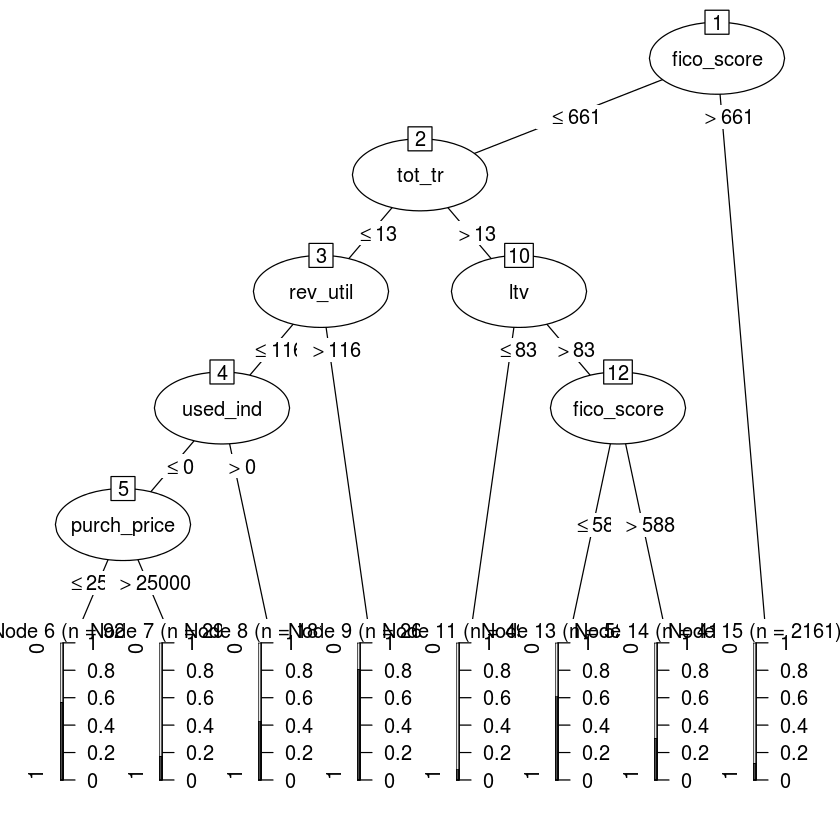

In [10]:
plot(model)

In [11]:
C5imp(model)

,Overall
fico_score,100.00
tot_tr,27.99
ltv,17.06
rev_util,10.93
used_ind,10.06
purch_price,4.03
tot_derog,0.00
age_oldest_tr,0.00
tot_open_tr,0.00
tot_rev_tr,0.00


In [13]:
rules<- C5.0(bad_ind~.,data=train,rules = T,control = tc)

summary(rules)


Call:
C5.0.formula(formula = bad_ind ~ ., data = train, rules = T, control = tc)


C5.0 [Release 2.07 GPL Edition]  	Thu Nov 10 16:50:06 2016
-------------------------------

Class specified by attribute `outcome'

Read 3001 cases (19 attributes) from undefined.data

Rules:

Rule 1: (2161/262, lift 1.1)
	fico_score > 661
	->  class 0  [0.878]

Rule 2: (2015/301, lift 1.1)
	tot_tr > 13
	->  class 0  [0.850]

Rule 3: (2879/531, lift 1.0)
	rev_util <= 116
	->  class 0  [0.815]

Rule 4: (26/5, lift 4.1)
	tot_tr <= 13
	rev_util > 116
	fico_score <= 661
	->  class 1  [0.786]

Default class: 0


Evaluation on training data (3001 cases):

	        Rules     
	  ----------------
	    No      Errors

	     4  563(18.8%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	  2417     5    (a): class 0
	   558    21    (b): class 1


	Attribute usage:

	 96.80%	rev_util
	 72.88%	fico_score
	 68.01%	tot_tr


Time: 0.1 secs


##  Section 2: CART算法(分类树)

In [14]:
#1.建立CART模型(依然使用原数据集)
##建模
#CART在R中的实现
#rpart包中有针对CART决策树算法提供的函数，比如rpart函数
#以及用于剪枝的prune函数
#rpart函数的基本形式：rpart(formula,data,subset,na.action=na.rpart,method.parms,control,...)
library(rpart)

In [15]:
#1.建立CART模型
#1.1 设置前向剪枝的条件

In [16]:
tc <- rpart.control(minsplit = 20,minbucket = 20,maxdepth = 10,xval = 5,cp=0.005)

## rpart.control对树进行一些设置  
## minsplit是最小分支节点数，这里指大于等于20，那么该节点会继续分划下去，否则停止  
## minbucket：树中叶节点包含的最小样本数  
## maxdepth：决策树最大深度 
## xval:交叉验证的次数
## cp全称为complexity parameter，指某个点的复杂度，对每一步拆分,模型的拟合优度必须提高的程度  

In [17]:
#1.2 建模

rpart.mod <- rpart(bad_ind~.,data = train,method = "class",parms = list(prior=c(0.65,0.35),split="gini"))

summary(rpart.mod)

Call:
rpart(formula = bad_ind ~ ., data = train, method = "class", 
    parms = list(prior = c(0.65, 0.35), split = "gini"))
  n= 3001 

         CP nsplit rel error    xerror       xstd
1 0.1464694      0 1.0000000 1.0000000 0.03733488
2 0.0102015      1 0.8535306 0.8620024 0.02968324
3 0.0100000      6 0.7842969 0.8816929 0.03174097

Variable importance
   fico_score     tot_derog      rev_util age_oldest_tr  tot_rev_line 
           59            13             7             5             5 
     loan_amt        tot_tr          msrp   purch_price  tot_rev_debt 
            2             2             2             2             1 
  veh_mileage      used_ind 
            1             1 

Node number 1: 3001 observations,    complexity param=0.1464694
  predicted class=0  expected loss=0.35  P(node) =1
    class counts:  2422   579
   probabilities: 0.650 0.350 
  left son=2 (2161 obs) right son=3 (840 obs)
  Primary splits:
      fico_score    < 661.5    to the right, improve=153.9

In [19]:
#1.3看变量重要性

rpart.mod$variable.importance

fico_score     tot_derog      rev_util age_oldest_tr  tot_rev_line 
  161.1968707    35.5071607    19.3771824    14.9327267    12.7240047 
     loan_amt        tot_tr          msrp   purch_price  tot_rev_debt 
    6.2478256     5.9809278     4.9731518     4.8731889     2.8873130 
  veh_mileage      used_ind    tot_income   tot_open_tr    tot_rev_tr 
    1.9492756     1.4994428     1.0496099     0.8107467     0.4996070 
          ltv 
    0.2154322

In [20]:
#cp是每次分割对应的复杂度系数
rpart.mod$cp

,CP,nsplit,rel error,xerror,xstd
1,0.1464694,0,1.0000000,1.0000000,0.03733488
2,0.0102015,1,0.8535306,0.8620024,0.02968324
3,0.0100000,6,0.7842969,0.8816929,0.03174097


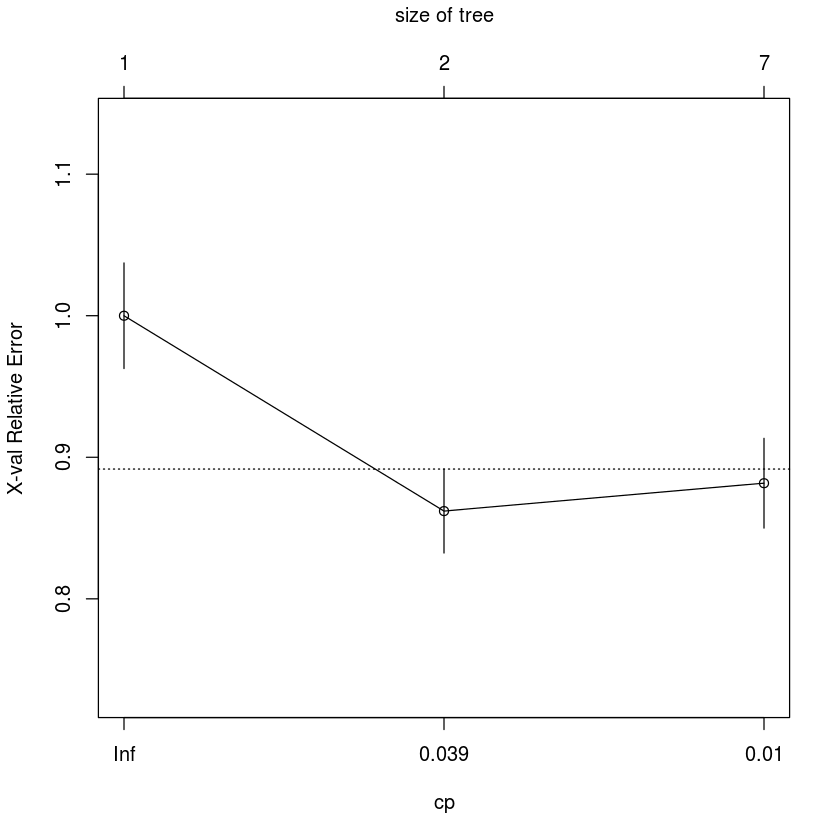

In [21]:
plotcp(rpart.mod)

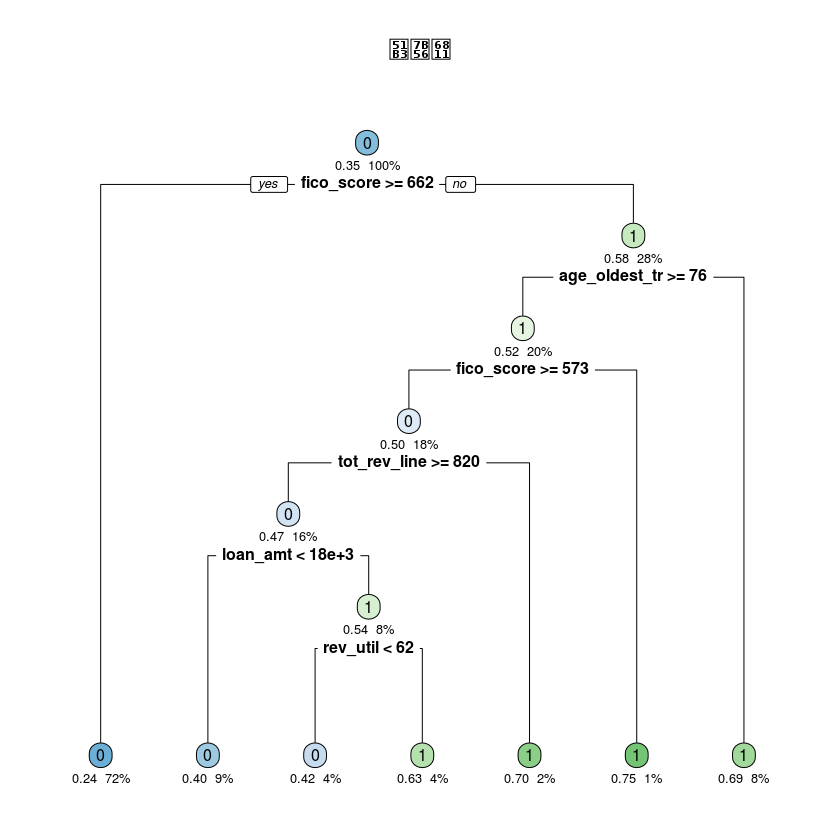

In [22]:
library(rpart.plot)

rpart.plot(rpart.mod,branch=1, extra=106, under=TRUE, faclen=0,
           cex=0.8, main="决策树")

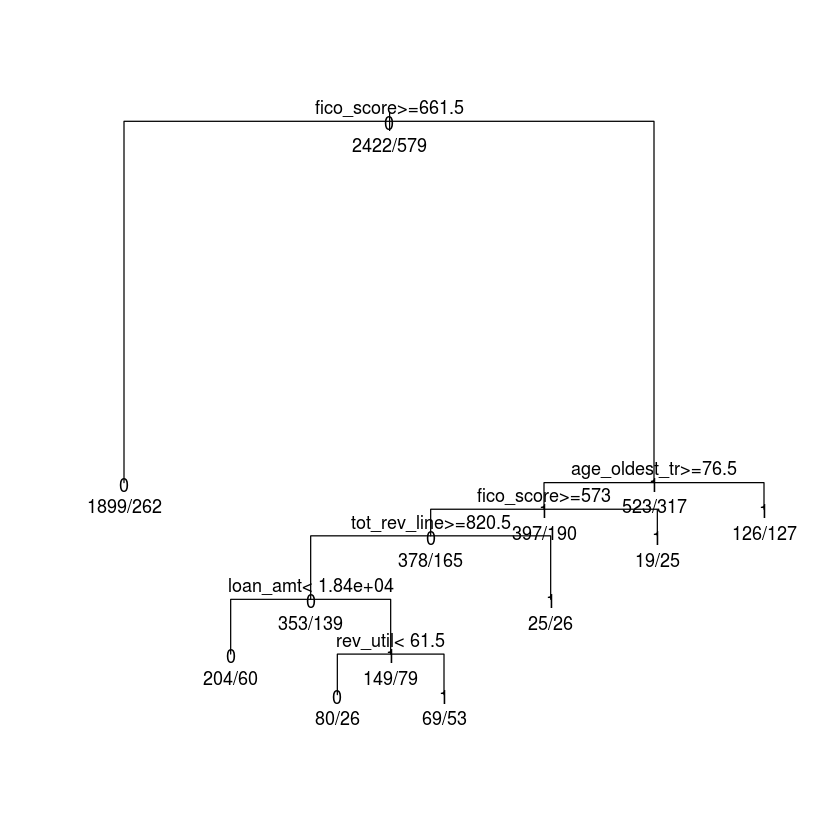

In [24]:
plot(rpart.mod)
text(rpart.mod,all=TRUE,digits=7,use.n=TRUE,cex=0.9,xpd=TRUE)

#   2.cart剪枝方法

In [25]:
#prune函数可以实现最小代价复杂度剪枝法，对于CART的结果，每个节点均输出一个对应的cp
#prune函数通过设置cp参数来对决策树进行修剪,cp为复杂度系数
## 我们可以用下面的办法选择具有最小xerror的cp的办法： 

rpart.mod.pru<-prune(rpart.mod,cp=rpart.mod$cptable[which.min(rpart.mod$cptable[,"xerror"]),"CP"])
rpart.mod.pru$cp

,CP,nsplit,rel error,xerror,xstd
1,0.1464694,0,1.0000000,1.0000000,0.03733488
2,0.0102015,1,0.8535306,0.8620024,0.02968324


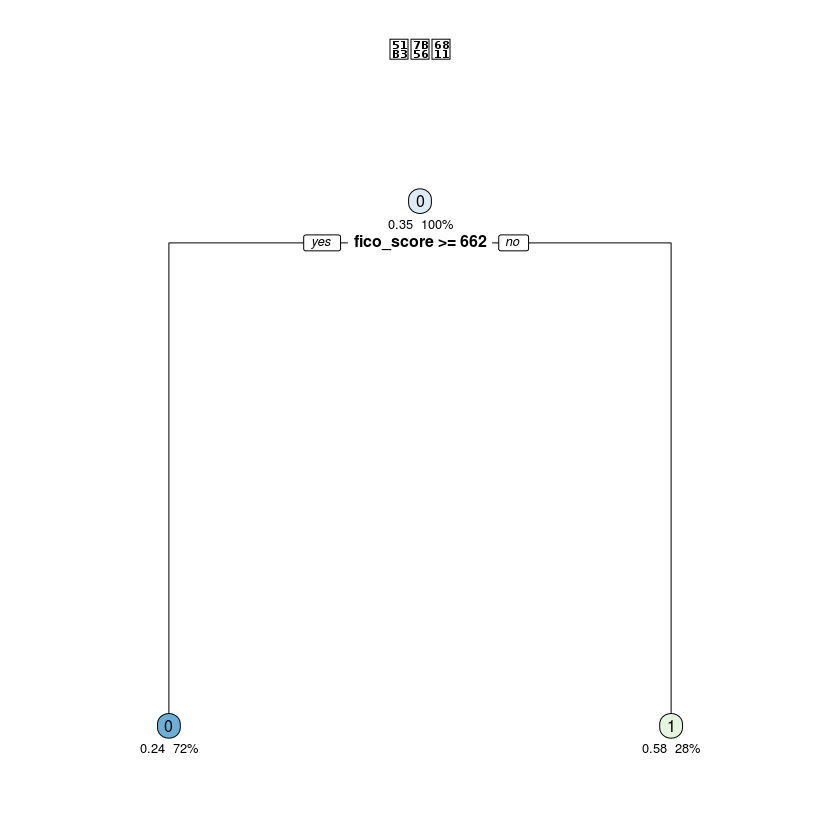

In [26]:
#3.绘制rpart.mod.pru的树状图
rpart.plot(rpart.mod.pru,branch=1, extra=106, under=TRUE, faclen=0,
           cex=0.8, main="决策树")

In [29]:
#4.cart预测
#使用模型对测试集进行预测
#使用模型进行预测
rpart.pred<-predict(rpart.mod.pru,test)
#可以看到，rpart.pred的结果有两列，第一列是为0的概率，第二列是为1的概率

head(rpart.pred)


,0,1
1,0.4227907,0.5772093
3,0.4227907,0.5772093
11,0.7629156,0.2370844
14,0.7629156,0.2370844
25,0.7629156,0.2370844
26,0.4227907,0.5772093


In [31]:
#通过设定阀值，得到预测分类
pre<-ifelse(rpart.pred[,2]>0.5,1,0)

head(pre)

1  3 11 14 25 26 
 1  1  0  0  0  1

In [32]:
#也可以通过如下方式来实现
preType<-predict(rpart.mod.pru,test,type="class")

head(preType)

1  3 11 14 25 26 
 1  1  0  0  0  1 
Levels: 0 1

## Section 3: 随机森林(分类树)

In [34]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [35]:
rf<-randomForest(bad_ind~.,data=train,importance = T,ntree=3)

rf$importance

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
tot_derog,0.0098793066,0.0087339080,0.0095334659,39.964384
tot_tr,0.0120428310,0.0053958805,0.0106905682,57.743948
age_oldest_tr,0.0183300079,0.0122474004,0.0169876160,63.879752
tot_open_tr,0.0050754228,-0.0261620364,-0.0010203660,36.009973
tot_rev_tr,0.0074249609,-0.0073922815,0.0044752427,25.484725
tot_rev_debt,0.0138145402,-0.0013086957,0.0108100558,51.137768
tot_rev_line,0.0401144222,-0.0080109248,0.0308097402,100.134945
rev_util,0.0185980605,0.0127549467,0.0176072428,59.836009
fico_score,0.0105374238,0.0487344770,0.0179857890,96.525010
purch_price,0.0106336716,0.0178616339,0.0119416083,57.224670


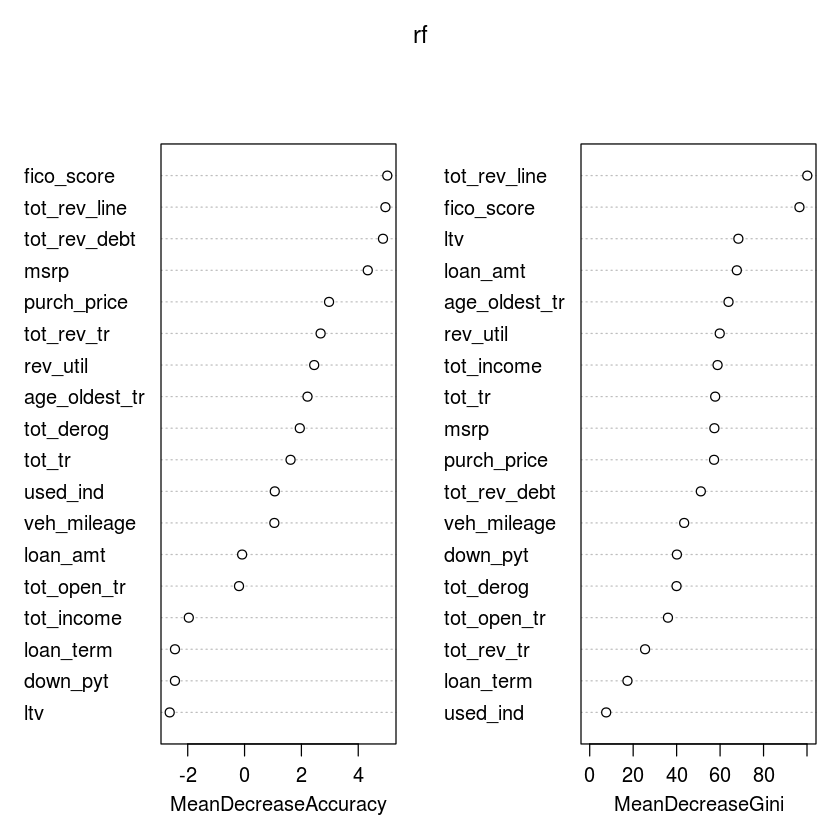

In [36]:
varImpPlot(rf)

In [37]:
importance(rf)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
tot_derog,2.67951758,0.53902219,1.94370420,39.964384
tot_tr,2.09467923,0.45686368,1.61828814,57.743948
age_oldest_tr,3.09540916,0.61926950,2.21460450,63.879752
tot_open_tr,1.45187028,-2.15743457,-0.19517371,36.009973
tot_rev_tr,34.09462575,-0.95024527,2.67601599,25.484725
tot_rev_debt,9.04819605,-0.09247148,4.87037031,51.137768
tot_rev_line,4.85169235,-0.61970108,4.95687658,100.134945
rev_util,2.19170012,2.44196932,2.45046937,59.836009
fico_score,1.86899939,5.68611083,5.02252773,96.525010
purch_price,3.06468660,2.43251288,2.97291725,57.224670


In [38]:
pre<-predict(rf,train,type="response")

head(pre)

2967 2495 4050  498 1603 3595 
   1    0    1    0    0    0 
Levels: 0 1